# Synthetic CDM Generation (SCDMG) using Probability Density Estimation techniques 

## Data description and import

The dataset is represented as a table, where each row correspond to a single CDM, and each CDM contains 103 recorded characteristics/features. There are thus 103 columns, which we describe below. The dataset is made of several unique collision/close approach events, which are identified in the `event_id` column. In turn, each collision event is made of several CDMs recorded over time. Therefore, a single collision event can be thought of as a times series of CDMs. From these CDMs, for every collision event, we are interested in predicting the final risk which is computed in the last CDM of the time series (i.e. the risk value in the last row of each collision event).

For the column description, we first describe columns which have unique names and then the columns whose name difference only depends on whether they are referring to the target object (if the column name starts with a **t**) or the chaser object (if the column name starts with a **c**). Here, target refers to the ESA satellites while chaser refers to the space debris/object we want to avoid. describe the column names shared for both the chaser and the target, we replace **t** and **c** with the placeholder **x**. For instance, `c_sigma_r` and `t_sigma_r` both correspond to the description of `x_sigma_r`.

Note that all the columns are numerical except for `c_object_type`.

#### Uniquely Named Columns

| Column      | Description |
| :---------: | :---------- |
| `risk`|self-computed value at the epoch of each CDM [base 10 log]. **In the test set, this value is to be predicted, at the time of closest approach for each `event_id`. Note that, as mentioned above, in the `test` set, we do not know the actual data contained in CDMs that are within 2 days to closest approach, since they happen in the "future".**|
| `event_id`| Unique id per collision event|
| `time_to_tca`| Time interval between CDM creation and time-of-closest approach [days]|
| `mission_id`| Identifier of mission that will be affected|
| `max_risk_estimate`| Maximum collision probability obtained by scaling combined covariance|
| `max_risk_scaling`| Scaling factor used to compute maximum collision probability|
| `miss_distance`| Relative position between chaser & target at tca [m]|
| `relative_speed`| Relative speed between chaser & target at tca [m/s]|
| `relative_position_n`| Relative position between chaser & target: normal (cross-track) [m]|
| `relative_position_r`| Relative position between chaser & target: radial [m]|
| `relative_position_t`| Relative position between chaser & target: transverse (along-track) [m]|
| `relative_velocity_n`| Relative velocity between chaser & target: normal (cross-track) [m/s]|
| `relative_velocity_r`| Relative velocity between chaser & target: radial [m/s]|
| `relative_velocity_t`| Relative velocity between chaser & target: transverse (along-track) [m/s]|
| `c_object_type`| Object type which is at collision risk with satellite|
| `geocentric_latitude`| Latitude of conjunction point [deg]|
| `azimuth`| Relative velocity vector: azimuth angle [deg]|
| `elevation`| Relative velocity vector: elevation angle [deg]|
| `F10`| 10.7 cm radio flux index [10−2210−22 W/(m2m2 Hz)]|
| `AP`| Daily planetary geomagnetic amplitude index|
| `F3M`| 81-day running mean of F10.7 (over 3 solar rotations) [10−2210−22 W/(m2m2 Hz)]|
| `SSN`| Wolf sunspot number|



#### Shared Column Names Between the Chaser and the Target Object
| Column      | Description |
| :---------: | :---------- |
 | `x_sigma_rdot`| Covariance; radial velocity standard deviation (sigma) [m/s]
 | `x_sigma_n`| Covariance; (cross-track) position standard deviation (sigma) [m]
 | `x_cn_r`| Covariance; correlation of normal (cross-track) position vs radial position
 | `x_cn_t`| Covariance; correlation of normal (cross-track) position vs transverse (along-track) position
 | `x_cndot_n`| Covariance; correlation of normal (cross-track) velocity vs normal (cross-track) position
 | `x_sigma_ndot`| Covariance; normal (cross-track) velocity standard deviation (sigma) [m/s]
 | `x_cndot_r`| Covariance; correlation of normal (cross-track) velocity vs radial position
 | `x_cndot_rdot`| Covariance; correlation of normal (cross-track) velocity vs radial velocity
 | `x_cndot_t`| Covariance; correlation of normal (cross-track) velocity vs transverse (along-track) position
 | `x_cndot_tdot`| Covariance; correlation of normal (cross-track) velocity vs transverse (along-track) velocity
 | `x_sigma_r`| Covariance; radial position standard deviation (sigma) [m]
 | `x_ct_r`| Covariance; correlation of transverse (along-track) position vs radial position
 | `x_sigma_t`| Covariance; transverse (along-track) position standard deviation (sigma) [m]
 | `x_ctdot_n`| Covariance; correlation of transverse (along-track) velocity vs normal (cross-track) position
 | `x_crdot_n`| Covariance; correlation of radial velocity vs normal (cross-track) position
 | `x_crdot_t`| Covariance; correlation of radial velocity vs transverse (along-track) position
 | `x_crdot_r`| Covariance; correlation of radial velocity vs radial position
 | `x_ctdot_r`| Covariance; correlation of transverse (along-track) velocity vs radial position
 | `x_ctdot_rdot`| Covariance; correlation of transverse (along-track) velocity vs radial velocity
 | `x_ctdot_t`| Covariance; correlation of transverse (along-track) velocity vs transverse (along-track) position
 | `x_sigma_tdot`| Covariance; transverse (along-track) velocity standard deviation (sigma) [m/s]
 | `x_position_covariance_det`| Determinant of covariance (~volume)
 | `x_cd_area_over_mass`| Ballistic coefficient [m2m2/kg]
| `x_cr_area_over_mass`| Solar radiation coefficient . A/m (ballistic coefficient equivalent)
 | `x_h_apo`| Apogee (-RearthRearth) [km]
 | `x_h_per`| Perigee (-RearthRearth)[km]
 | `x_j2k_ecc`| Eccentricity
 | `x_j2k_inc`| Inclination [deg]
 | `x_j2k_sma`| Semi-major axis [km]
 | `x_sedr`| Energy dissipation rate [W/kg]
 | `x_span`| Size used by the collision risk computation algorithm (minimum 2 m diameter assumed for the chaser) [m]
 | `x_rcs_estimate`| Radar cross-sectional area [m2m2]
 | `x_actual_od_span`| Actual length of update interval for orbit determination [days]
 | `x_obs_available`| Number of observations available for orbit determination (per CDM)
 | `x_obs_used`| Number of observations used for orbit determination (per CDM)
 | `x_recommended_od_span`| Recommended length of update interval for orbit determination [days]
 | `x_residuals_accepted`| Orbit determination residuals
 | `x_time_lastob_end`| End of the time interval in days (with respect to the CDM creation epoch) of the last accepted observation used in the orbit determination
 | `x_time_lastob_start`| Start of the time in days (with respect to the CDM creation epoch) of the last accepted observation used in the orbit determination
 | `x_weighted_rms`| Root-mean-square in least-squares orbit determination

### Import required Python libraries

In [1]:
# Import libraries required for EDA
import numpy as np
import scipy.stats as st
import os

from IPython.display import display

# Import file system libraries
from pathlib import Path

# Import matplotlib library and setup environment for plots
%matplotlib inline
%config InlineBackend.figure_format='retina'
from matplotlib import pyplot as plt, rc

# Import json library and create function to format dictionaries.
import json
format_json = lambda x: json.dumps(x, indent=4)

# Import pandas and set pandas DataFrame visualization parameters
import pandas as pd
pd.options.display.max_columns = None
pd.options.display.max_rows = None

# Set rendering parameters to use TeX font if not working on Juno app.
if not '/private/var/' in os.getcwd():
    rc('font', **{'family': 'serif', 'serif': ['Computer Modern'], 'size': 11})
    rc('text', usetex=True)
    
# Get current working directory path for the tool parent folder and print it.
parent_folder = 'Tool'
cwd = str(Path(os.getcwd()[:os.getcwd().index(parent_folder)+len(parent_folder)]))
print('Parent working directory: %s' % cwd)

# Import custom libraries from local folder.
import sys
sys.path.append("..")

from library.irplib import utils, eda, sdg

Parent working directory: /Users/jjrr/Documents/SCA-Project/Tool


### Training dataset import

In [2]:
# Import transformed training dataset
df = eda.import_cdm_data(os.path.join(cwd,'data','esa-challenge','train_data_transformed.csv'))

# Get only last CDM data from every event_id
df_lastCDM  = df.drop_duplicates('event_id', keep='last')
df_firstCDM = df.drop_duplicates('event_id', keep='first')

# Show first data points to explore data types
display(df.head(10))
display(df_lastCDM.head(10))
display(df_firstCDM.head(10))

,Unnamed: 0,event_id,time_to_tca,mission_id,risk,max_risk_estimate,max_risk_scaling,miss_distance,relative_speed,relative_position_r,relative_position_t,relative_position_n,relative_velocity_r,relative_velocity_t,relative_velocity_n,t_time_lastob_start,t_time_lastob_end,t_recommended_od_span,t_actual_od_span,t_obs_available,t_obs_used,t_residuals_accepted,t_weighted_rms,t_rcs_estimate,t_cd_area_over_mass,t_cr_area_over_mass,t_sedr,t_j2k_sma,t_j2k_ecc,t_j2k_inc,t_ct_r,t_cn_r,t_cn_t,t_crdot_r,t_crdot_t,t_crdot_n,t_ctdot_r,t_ctdot_t,t_ctdot_n,t_ctdot_rdot,t_cndot_r,t_cndot_t,t_cndot_n,t_cndot_rdot,t_cndot_tdot,c_object_type,c_time_lastob_start,c_time_lastob_end,c_recommended_od_span,c_actual_od_span,c_obs_available,c_obs_used,c_residuals_accepted,c_weighted_rms,c_rcs_estimate,c_cd_area_over_mass,c_cr_area_over_mass,c_sedr,c_j2k_sma,c_j2k_ecc,c_j2k_inc,c_ct_r,c_cn_r,c_cn_t,c_crdot_r,c_crdot_t,c_crdot_n,c_ctdot_r,c_ctdot_t,c_ctdot_n,c_ctdot_rdot,c_cndot_r,c_cndot_t,c_cndot_n,c_cndot_rdot,c_cndot_tdot,t_span,c_span,t_h_apo,t_h_per,c_h_apo,c_h_per,geocentric_latitude,azimuth,elevation,mahalanobis_distance,t_position_covariance_det,c_position_covariance_det,t_sigma_r,c_sigma_r,t_sigma_t,c_sigma_t,t_sigma_n,c_sigma_n,t_sigma_rdot,c_sigma_rdot,t_sigma_tdot,c_sigma_tdot,t_sigma_ndot,c_sigma_ndot,F10,F3M,SSN,AP
0,0,0,1.566798,5,-10.204955,-7.834756,8.602101,14923.0,13792.0,453.8,5976.6,-13666.8,-7.2,-12637.0,-5525.9,1.0,0.0,3.78,3.78,459,458,98.9,1.265,0.4020,1.648115,0.706590,-9.879172,6996.918867,0.003997,97.806412,-0.397969,0.292258,0.040799,0.394221,-0.999674,-0.038498,-0.981098,0.214612,-0.316493,-0.210247,0.170737,-0.001551,0.531593,0.002117,-0.179278,UNKNOWN,180.0,2.0,15.85,15.85,15,15,100.0,2.360,NaN,0.676499,0.499637,-6.567277,7006.607320,0.003144,74.045735,-0.824859,0.473976,-0.002576,0.825216,-0.999998,0.003565,-0.732954,0.220006,-0.814249,-0.220621,0.249855,0.196620,0.722186,-0.196908,-0.668487,1.0,2.0,646.745439,590.818294,650.497251,606.443389,-73.574095,-23.618769,0.029910,129.430951,13.510814,38.329744,1.400673,5.586208,4.924475,10.903510,0.577410,3.841870,-1.914944,4.065123,-5.498756,-1.801545,-5.813629,-0.950721,89,83,42,11
1,1,0,1.207494,5,-10.355758,-7.848937,8.956374,14544.0,13792.0,474.3,5821.2,-13319.8,-7.0,-12637.0,-5525.9,1.0,0.0,3.79,3.79,456,455,98.5,1.270,0.4020,1.607704,0.900255,-9.721584,6996.920255,0.003996,97.806420,-0.073137,0.297366,0.060541,0.069652,-0.998192,-0.052511,-0.994240,-0.029644,-0.302333,0.034030,0.179696,0.001552,0.561142,-0.005165,-0.181036,UNKNOWN,180.0,2.0,15.85,15.85,15,15,100.0,2.360,NaN,0.676499,0.499637,-6.567277,7006.621053,0.003144,74.045736,-0.818207,0.482754,-0.003578,0.818573,-0.999998,0.004574,-0.728759,0.202595,-0.817490,-0.203216,0.258964,0.195718,0.721903,-0.196008,-0.674979,1.0,2.0,646.743506,590.823004,650.513314,606.454793,-73.570690,-23.618769,0.029079,271.540424,11.645172,38.318093,1.260385,5.569076,4.026603,10.898258,0.588319,3.841512,-2.818890,4.059864,-5.585288,-1.805559,-5.831622,-0.950900,89,83,42,11
2,2,0,0.952193,5,-10.345631,-7.847406,8.932195,14475.0,13792.0,474.6,5796.2,-13256.1,-7.0,-12637.0,-5525.9,1.0,0.0,3.79,3.80,456,455,98.5,1.257,0.4020,1.592208,0.695163,-9.712935,6996.920553,0.003996,97.806418,-0.109230,0.305189,0.043711,0.107079,-0.996235,-0.034287,-0.996674,0.033933,-0.308501,-0.030161,0.123760,0.019630,0.579274,-0.023726,-0.125737,UNKNOWN,180.0,2.0,15.85,15.85,15,15,100.0,2.360,NaN,0.676499,0.499637,-6.567277,7006.623524,0.003144,74.045737,-0.817408,0.483828,-0.003742,0.817774,-0.999998,0.004738,-0.729083,0.201698,-0.817662,-0.202320,0.260092,0.195558,0.721854,-0.195849,-0.675347,1.0,2.0,646.745607,590.821499,650.515082,606.457965,-73.570088,-23.618769,0.029079,347.899292,10.757052,38.315920,1.212547,5.567071,3.624286,10.897246,0.599902,3.841445,-3.237592,4.058849,-5.633474,-1.805745,-5.820248,-0.950932,89,83,42,11
3,3,0,0.579669,5,-10.337809,-7.845880,8.913444,14579.0,13792.0,472.7,5838.9,-13350.7,-7.0,-12637.0,-5525.9,1.0,0.0,3.86,3.86,443,442,98.4,

,Unnamed: 0,event_id,time_to_tca,mission_id,risk,max_risk_estimate,max_risk_scaling,miss_distance,relative_speed,relative_position_r,relative_position_t,relative_position_n,relative_velocity_r,relative_velocity_t,relative_velocity_n,t_time_lastob_start,t_time_lastob_end,t_recommended_od_span,t_actual_od_span,t_obs_available,t_obs_used,t_residuals_accepted,t_weighted_rms,t_rcs_estimate,t_cd_area_over_mass,t_cr_area_over_mass,t_sedr,t_j2k_sma,t_j2k_ecc,t_j2k_inc,t_ct_r,t_cn_r,t_cn_t,t_crdot_r,t_crdot_t,t_crdot_n,t_ctdot_r,t_ctdot_t,t_ctdot_n,t_ctdot_rdot,t_cndot_r,t_cndot_t,t_cndot_n,t_cndot_rdot,t_cndot_tdot,c_object_type,c_time_lastob_start,c_time_lastob_end,c_recommended_od_span,c_actual_od_span,c_obs_available,c_obs_used,c_residuals_accepted,c_weighted_rms,c_rcs_estimate,c_cd_area_over_mass,c_cr_area_over_mass,c_sedr,c_j2k_sma,c_j2k_ecc,c_j2k_inc,c_ct_r,c_cn_r,c_cn_t,c_crdot_r,c_crdot_t,c_crdot_n,c_ctdot_r,c_ctdot_t,c_ctdot_n,c_ctdot_rdot,c_cndot_r,c_cndot_t,c_cndot_n,c_cndot_rdot,c_cndot_tdot,t_span,c_span,t_h_apo,t_h_per,c_h_apo,c_h_per,geocentric_latitude,azimuth,elevation,mahalanobis_distance,t_position_covariance_det,c_position_covariance_det,t_sigma_r,c_sigma_r,t_sigma_t,c_sigma_t,t_sigma_n,c_sigma_n,t_sigma_rdot,c_sigma_rdot,t_sigma_tdot,c_sigma_tdot,t_sigma_ndot,c_sigma_ndot,F10,F3M,SSN,AP
4,4,0,0.257806,5,-10.391260,-7.852942,9.036838,14510.0,13792.0,478.7,5811.1,-13288.0,-7.0,-12637.0,-5525.9,1.0,0.0,3.86,3.86,440,439,98.8,1.340,0.4020,1.657651,0.722942,-9.602338,6996.920446,0.003996,97.806426,0.417865,0.406002,0.246911,-0.465256,-0.983144,-0.243006,-0.999749,-0.430895,-0.405723,0.479990,0.223469,0.118674,0.543475,-0.143542,-0.224060,UNKNOWN,180.0,2.0,15.85,15.85,15,15,100.0,2.360,NaN,0.676499,0.499637,-6.567277,7006.626646,0.003144,74.045736,-0.815980,0.485794,-0.004081,0.816347,-0.999998,0.005077,-0.727257,0.196662,-0.818575,-0.197284,0.261753,0.195657,0.721794,-0.195947,-0.677041,1.00,2.0,646.745868,590.821024,650.519613,606.459678,-73.570409,-23.618769,0.029079,469.178802,8.965347,38.317072,1.221472,5.563476,2.779490,10.897918,0.672074,3.841487,-4.194687,4.059524,-5.607668,-1.806842,-5.738377,-0.950913,89,83,40,14
8,8,1,3.570013,5,-9.248105,-7.327533,7.425994,26899.0,3434.0,-82.0,-26067.0,6638.2,56.8,-847.8,-3328.2,1.0,0.0,4.04,4.04,430,429,99.0,1.402,0.4030,1.809278,0.336598,-10.382249,7001.561205,0.001028,97.767002,0.025433,0.318842,0.027919,-0.050648,-0.997384,-0.040625,-0.999560,-0.053437,-0.319966,0.079098,0.016432,-0.049850,0.760496,0.046685,-0.015341,DEBRIS,1.0,0.0,3.54,3.55,33,33,100.0,1.650,0.0045,0.294611,0.000000,-4.741029,6880.588349,0.017491,82.431524,-0.896007,-0.341763,0.075631,0.895993,-1.000000,-0.075170,-0.982560,0.962694,0.243049,-0.962685,-0.389578,0.249596,0.811324,-0.249363,0.344542,1.00,2.0,630.622566,616.225845,622.796659,382.106039,-54.109782,-75.708851,-0.947480,62.058087,15.444216,36.716460,1.696593,4.604334,4.749726,10.233657,1.329935,4.576352,-2.081025,3.409257,-5.135739,-1.743221,-5.681594,-2.841973,71,87,21,5
28,28,2,0.401947,2,-30.000000,-7.449283,37296.168207,18708.0,14347.0,-717.9,-5159.0,17968.9,14.4,-13791.4,-3957.2,1.0,0.0,3.56,3.56,481,481,99.1,1.056,3.4479,2.317445,1.428942,-11.263935,7158.408492,0.000863,98.523055,0.170637,0.077322,0.044859,-0.301307,-0.945516,-0.007249,-0.999839,-0.187388,-0.076980,0.317338,0.101294,0.042436,-0.524384,-0.042744,-0.102280,UNKNOWN,1.0,0.0,14.56,14.56,18,18,100.0,1.733,NaN,1.664675,1.872374,-7.434290,7168.395415,0.001298,69.718579,-0.733858,0.811887,-0.712991,0.677382,-0.935640,0.552588,-0.999956,0.728830,-0.812411,-0.671514,0.854603,-0.742879,0.966785,0.540052,-0.855151,12.00,2.0,786.448033,774.094951,799.560390,780.956440,63.902737,-16.009902,-0.057504,279.634916,7.273050,27.708215,1.029720,4.615584,2.212660,5.443276,0.412438,4.765785,-4.647069,-1.514943,-5.836816,-2.249969,-5.841924,-1.237842,70,77,0,4
49,49,3,0.283061,19,-30.000000,-8.439735,45859.719269,23861.0,13574.0,51.8,10055.9,21639.4,-39.6,-12310.9,5718.9,1.0,0.0,7.56,7.56,244,23

,Unnamed: 0,event_id,time_to_tca,mission_id,risk,max_risk_estimate,max_risk_scaling,miss_distance,relative_speed,relative_position_r,relative_position_t,relative_position_n,relative_velocity_r,relative_velocity_t,relative_velocity_n,t_time_lastob_start,t_time_lastob_end,t_recommended_od_span,t_actual_od_span,t_obs_available,t_obs_used,t_residuals_accepted,t_weighted_rms,t_rcs_estimate,t_cd_area_over_mass,t_cr_area_over_mass,t_sedr,t_j2k_sma,t_j2k_ecc,t_j2k_inc,t_ct_r,t_cn_r,t_cn_t,t_crdot_r,t_crdot_t,t_crdot_n,t_ctdot_r,t_ctdot_t,t_ctdot_n,t_ctdot_rdot,t_cndot_r,t_cndot_t,t_cndot_n,t_cndot_rdot,t_cndot_tdot,c_object_type,c_time_lastob_start,c_time_lastob_end,c_recommended_od_span,c_actual_od_span,c_obs_available,c_obs_used,c_residuals_accepted,c_weighted_rms,c_rcs_estimate,c_cd_area_over_mass,c_cr_area_over_mass,c_sedr,c_j2k_sma,c_j2k_ecc,c_j2k_inc,c_ct_r,c_cn_r,c_cn_t,c_crdot_r,c_crdot_t,c_crdot_n,c_ctdot_r,c_ctdot_t,c_ctdot_n,c_ctdot_rdot,c_cndot_r,c_cndot_t,c_cndot_n,c_cndot_rdot,c_cndot_tdot,t_span,c_span,t_h_apo,t_h_per,c_h_apo,c_h_per,geocentric_latitude,azimuth,elevation,mahalanobis_distance,t_position_covariance_det,c_position_covariance_det,t_sigma_r,c_sigma_r,t_sigma_t,c_sigma_t,t_sigma_n,c_sigma_n,t_sigma_rdot,c_sigma_rdot,t_sigma_tdot,c_sigma_tdot,t_sigma_ndot,c_sigma_ndot,F10,F3M,SSN,AP
0,0,0,1.566798,5,-10.204955,-7.834756,8.602101,14923.0,13792.0,453.8,5976.6,-13666.8,-7.2,-12637.0,-5525.9,1.0,0.0,3.78,3.78,459,458,98.9,1.265,0.4020,1.648115,0.706590,-9.879172,6996.918867,0.003997,97.806412,-0.397969,0.292258,0.040799,0.394221,-0.999674,-0.038498,-0.981098,0.214612,-0.316493,-0.210247,0.170737,-0.001551,0.531593,0.002117,-0.179278,UNKNOWN,180.0,2.0,15.85,15.85,15,15,100.0,2.360,NaN,0.676499,0.499637,-6.567277,7006.607320,0.003144,74.045735,-0.824859,0.473976,-0.002576,0.825216,-0.999998,0.003565,-0.732954,0.220006,-0.814249,-0.220621,0.249855,0.196620,0.722186,-0.196908,-0.668487,1.00,2.0,646.745439,590.818294,650.497251,606.443389,-73.574095,-23.618769,0.029910,129.430951,13.510814,38.329744,1.400673,5.586208,4.924475,10.903510,0.577410,3.841870,-1.914944,4.065123,-5.498756,-1.801545,-5.813629,-0.950721,89,83,42,11
5,5,1,6.530455,5,-7.561299,-7.254301,2.746782,2392.0,3434.0,74.3,2317.1,-589.4,25.9,-847.8,-3328.2,1.0,0.0,4.06,4.06,432,431,98.9,1.447,0.4030,1.595188,0.090725,-10.276501,7001.527412,0.001030,97.767020,-0.134713,0.126515,-0.023597,0.108845,-0.998856,0.018619,-0.999598,0.107629,-0.126921,-0.081454,-0.096789,-0.082136,0.810101,0.085601,0.099044,DEBRIS,1.0,0.0,3.28,3.28,33,33,100.0,1.394,0.0045,0.307134,0.000000,-4.498246,6880.652110,0.017491,82.431758,-0.858928,0.106509,0.325019,0.858976,-1.000000,-0.324987,-0.910190,0.993879,0.240336,-0.993890,-0.682288,0.812345,0.224426,-0.812406,0.803415,1.00,2.0,630.601047,616.179777,622.863863,382.166357,-54.220645,-75.708851,-0.432069,4.183398,17.927486,36.311456,1.869822,4.182252,5.555486,11.263600,1.555683,3.937777,-1.278861,4.438849,-4.964692,-1.137492,-5.472981,-3.049457,71,88,0,2
9,9,2,6.983474,2,-10.816161,-6.601713,13.293159,22902.0,14348.0,-1157.6,-6306.2,21986.3,15.8,-13792.0,-3957.1,1.0,0.0,3.92,3.92,444,442,99.4,1.094,3.4505,3.042086,0.924980,-10.894082,7158.394530,0.000860,98.523094,-0.099768,0.357995,-0.122174,0.085472,-0.999674,0.121504,-0.999114,0.057809,-0.353866,-0.043471,-0.025138,0.087954,-0.430583,-0.088821,0.021409,UNKNOWN,180.0,2.0,13.87,13.87,15,15,100.0,1.838,NaN,1.579769,2.227246,-7.228422,7168.396928,0.001367,69.717278,-0.068526,0.636970,-0.038214,0.064305,-0.999989,0.036762,-0.996314,0.153806,-0.634961,-0.149627,0.715984,-0.159057,0.953945,0.156803,-0.723349,12.00,2.0,786.417082,774.097978,800.056782,780.463075,63.955771,-16.008858,-0.063092,115.208802,15.229084,42.445608,2.201549,5.549886,4.994608,10.549895,0.496310,5.385613,-1.875151,3.681239,-4.670266,-1.309462,-5.550399,-1.080559,73,77,27,4
29,29,3,6.950088,19,-9.568315,-7.057793,8.965371,29654.0,13574.0,19.2,12494.9,26893.3,-42.3,-12311.1,5718.7,1.0,0.0,7.52,7.52,191,191,100.0,1.1

In [3]:
# Get all columns from the dataset
features_groups = {
    "targets": [
        "risk", "max_risk_estimate", "max_risk_scaling"
        ],
    "ids": [
        "event_id", "mission_id"
        ],
    "conjunction": [
        "time_to_tca", "c_object_type", "miss_distance", "mahalanobis_distance", 
        "geocentric_latitude", "azimuth", "elevation",
        "F10", "F3M", "SSN", "AP"
        ],
    "relative_state": [
        "relative_position_r", "relative_position_t", "relative_position_n",
        "relative_velocity_r", "relative_velocity_t", "relative_velocity_n",
        "relative_speed"
        ],
    "objects": {
        "coefficients": [
            "cd_area_over_mass", "cr_area_over_mass"
        ],
        "covariance": [
            "ct_r", "cn_r", "cn_t",
            "crdot_r", "crdot_t", "crdot_n",
            "ctdot_r", "ctdot_t", "ctdot_n",
            "cndot_r", "cndot_t", "cndot_n",
            "ctdot_rdot", "cndot_rdot", "cndot_tdot",
            "sigma_r", "sigma_t", "sigma_n",
            "sigma_rdot", "sigma_tdot", "sigma_ndot" 
        ],
        "orb_elements": [
            "h_apo", "h_per", "j2k_ecc", "j2k_inc", "j2k_sma"
        ],
        "miscellaneous": [
            "span", "actual_od_span", "recommended_od_span", "obs_available", "obs_used",
            "time_lastob_end", "time_lastob_start", "position_covariance_det", 
            "rcs_estimate", "sedr", "residuals_accepted", "weighted_rms"
        ]
    }
}

## 1. - Introduction to Probability Density Estimation

[Introduction to Probability Density Estimation](https://machinelearningmastery.com/probability-density-estimation/)

From a statistical perspective, the best way to generate additional synthetic data that reliably mirrors the real data distribution is by analysing and estimating its probability density, that is, to understand how likely is to get a value from a continuous variable. Two techniques to estimate the Probability Density of all data distributions are used in the present EDA:

 - **Parametric**: the statistical distribution of the real data is described by an analytical and well-known statistical probability distribution by estimating the parameters implicit in the function. In this approach, a function is defined to find the statistical distribution that best fits the real data distribution of all existing continuous distributions available in [SciPy.org](https://docs.scipy.org/doc/scipy/reference/stats.html). The use of this method is limited to unimodal data distributions or data distributions with simple profiles.
 
 - **Non-parametric**: alternative method when the data distribution cannot be appropriately described analytically by a common probability distribution or cannot be easily made to fit the distribution (as it happens with multi-modal distributions). Among the multiple non-parametric methods available for Probability Density Estimation, the method used for estimating the probability density function of a continuous random variable in this analysis is the so-called *Kernel Density Estimation* (KDE). In particular the `KernelDensity` estimator from [Scikit-learn.org](https://scikit-learn.org/stable/modules/density.html) is used. More information on how this is done can be found in the following two articles:
 
     - [Histograms and KDE by Michael Lerner](https://mglerner.github.io/posts/histograms-and-kernel-density-estimation-kde-2.html?p=28)
     - [Kernel Density Estimation in Python by Jake VanderPlas](https://jakevdp.github.io/blog/2013/12/01/kernel-density-estimation/)
 
The analysis developed in Section 2 on the different clusters data distributions supports the identification of those continuous variables that can be described using the parametric approach and those to be defined by the non-parametric one.

## 2. - Parametric Probability Density Estimation

The first approach to be considered when generating synthetic data is the parametric as it provides an excellent compromise between data distribution description accuracy and statistical simplicity based on assumptions about the shape of the distribution in the underlying population and about the form or parameters of the assumed distribution. However, not all features can be accurately described using the parametric approach and a reliable but simple enough criteria for its identification must be used.

In this regard, for the purposes of this EDA, the coefficient of determination $R^2$ between the actual and estimated probability densities is the parameter that determines whether a feature can be described using the parametric method. That is, those features for which the $R^2$ score between its actual and estimated probability density from an analytical statistical model is above a certain threshold (usually $R^2 \geq 0.95$) is considered good enough to be used to produce synthetic data.

### 2.1. - SciPy statistical distributions evaluation per feature

In order to make the fitting process to the SciPy statistical distribution on every feature in the dataset, the following UDF to import stats models ranked by $R^2$. This allows to easily re-run already evaluated features in a timely manner. 

In [4]:
# Get scipy distributions
scipy_distributions = eda.get_scipy_distributions(cwd=cwd)

In [5]:
def import_stdists_ranking():
    """Import satistical fitting results per feature in a DataFrame."""
    
    # Check if parametric_ranking dataset is available in the temporary folder
    filepath = os.path.join(cwd,'notebooks','nbtemp','parametric_ranking_params.csv')

    # Import ranking dataframe if already available
    if os.path.exists(filepath):
        ranking = pd.read_csv(filepath_or_buffer=filepath, sep=',', header='infer', 
                              index_col=0, decimal='.', encoding='utf-8')
    else:
        # Check if temp folder already exists, create new one otherwise
        if not os.path.exists(os.path.join(cwd,'notebooks','nbtemp')): 
            os.mkdir(os.path.join(cwd,'notebooks','nbtemp'))

        # Initialize ranking dataframe to evaluate best distributions per feature
        ranking = pd.DataFrame(index = [dist.name for dist in scipy_distributions])

    best_dists = {}

    for feature in ranking.columns:

        dists     = np.asarray(ranking.index.values)
        r2_scores = np.asarray([eval(stdist)['r2_score'] for stdist in ranking[feature]])
        params    = np.asarray([eval(stdist)['params'] for stdist in ranking[feature]])
        
        idxmax    = r2_scores==np.max(r2_scores)

        best_dists[feature] = {'dist': eval('st.' + dists[idxmax][0]), 'r2_score': r2_scores[idxmax][0], 'params': params[idxmax][0]}
    
    return ranking, best_dists, filepath


In [6]:
# Import ranking if available
# ranking, best_dists, filepath = import_stdists_ranking()

ranking, best_dists, filepath = import_stdists_ranking()

# Initialize methods dictionary to differenciate features that could be described using the parametric approach from
# those that cannot.
methods = {'parametric':{},'non-parametric':{}}

# Define the R2 score for which the statistical function is considered to approximate well the actual data
r2_threshold = 0.95

for cluster, subclusters in features_groups.items():

    # Skip fitting process for targets and ids features as no synthetic data is required for them.
    if cluster in ['targets', 'ids']: continue

    methods['parametric'].update({cluster:{} if isinstance(subclusters, dict) else []})
    methods['non-parametric'].update({cluster:{} if isinstance(subclusters, dict) else []})

    if not isinstance(subclusters, dict): subclusters = {cluster:subclusters}

    for subcluster, features in subclusters.items():
        if cluster!=subcluster:
            methods['parametric'][cluster].update({subcluster:[]})
            methods['non-parametric'][cluster].update({subcluster:[]})
            features = ['t_' + xfeature for xfeature in features] + ['c_' + xfeature for xfeature in features]
            
        for feature in features:

            if df_lastCDM[feature].dtypes=='category':continue

            # Set column name to study and remove outliers. 
            data = df_lastCDM[feature].dropna()

            # Check if variable has already been processed
            if feature in ranking.columns:
                best_dist = {'dist':best_dists[feature]['dist'], 'r2_score':best_dists[feature]['r2_score']}

            else:
                # Find best distribution that describes the feature
                stdist, ranking_i = eda.find_best_distribution(data, scipy_distributions)
                best_dist = {'dist':stdist.dist, 'r2_score':stdist.r2_score()}
                
                # Prepare ranking dataset to be exported as CSV
                ranking_i.set_index('distribution', inplace=True)
                ranking_i.rename(columns={'results':feature}, inplace=True)
                ranking = ranking.join(ranking_i)

                # Export results to a CSV file
                ranking.to_csv(path_or_buf=filepath, sep=',', header=True, index=True, decimal='.')

            # If R2 is lower than 0.95 do not use parammetric approach
            method = 'parametric' if best_dist['r2_score']>=r2_threshold else 'non-parametric'
            if cluster==subcluster:
                methods[method][cluster].append(feature)
            else:
                methods[method][cluster][subcluster].append(feature)

            print(f'Cluster: {subcluster:17s} Feature: {feature:30s} Parametric: {("YES" if best_dist["r2_score"]>=r2_threshold else "-"):10s}'
                  f' Dist. (R2 = {best_dist["r2_score"]:.3f}): {best_dist["dist"].name:25s} ')

Cluster: conjunction       Feature: time_to_tca                    Parametric: -          Dist. (R2 = 0.907): skewcauchy                
Cluster: conjunction       Feature: miss_distance                  Parametric: YES        Dist. (R2 = 0.972): kappa4                    
Cluster: conjunction       Feature: mahalanobis_distance           Parametric: YES        Dist. (R2 = 0.997): halfgennorm               
Cluster: conjunction       Feature: geocentric_latitude            Parametric: YES        Dist. (R2 = 0.979): wrapcauchy                
Cluster: conjunction       Feature: azimuth                        Parametric: -          Dist. (R2 = 0.813): gennorm                   
Cluster: conjunction       Feature: elevation                      Parametric: YES        Dist. (R2 = 0.998): nct                       
Cluster: conjunction       Feature: F10                            Parametric: -          Dist. (R2 = 0.865): norminvgauss              
Cluster: conjunction       Feature: F3M  

### 3.2. - Non-Parametric Probability Density Estimation using KDE

The keplerian elements that describle the orbits for both targets and chasers objects shows multimodal distributions that cannot be described by continuous stats models. As a consequence, the Non-parametric Probability Density Estimation (PDE) with KDE shall be used in order to fit a model that allows for synthetic data generation with a realistic distribution.

 - [Histograms and KDE by Michael Lerner](https://mglerner.github.io/posts/histograms-and-kernel-density-estimation-kde-2.html?p=28)
 - [Kernel Density Estimation in Python by Jake VanderPlas](https://jakevdp.github.io/blog/2013/12/01/kernel-density-estimation/)

Research paper sections:
- Abstract
- Introduction
- Literature review
- Methodology
- Results & Discussion
- Conclusion
- References

In [7]:
feature = 'relative_position_r'
data = df_lastCDM[feature].dropna().to_numpy()

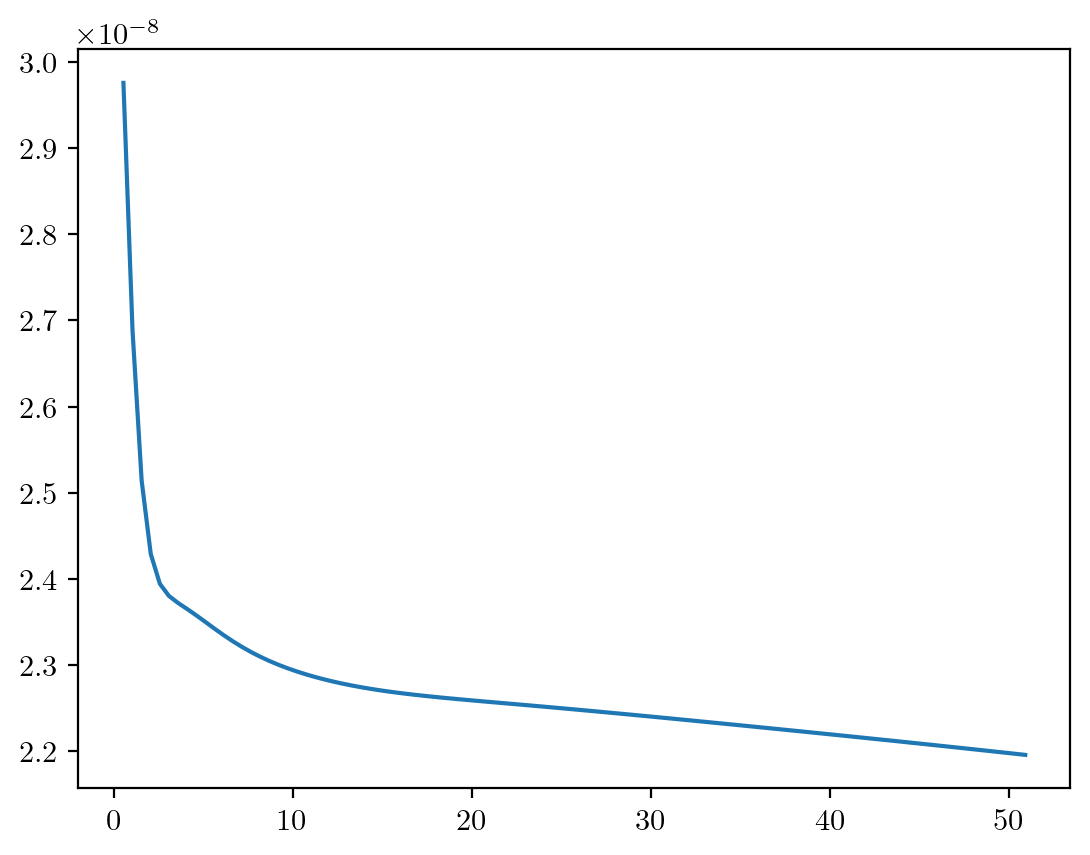

[ True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False]
99
[2.97547239e-08 2.68767251e-08 2.51405941e-08 2.42890077e-08
 2.39432856e-08 2.38017330e-08 2.37209629e-08 2.36505693e-08
 2.35772425e-08 2.35003969e-08 2.34229615e-08 2.33479236e-08
 2.32772871e-08 2.32120420e-08 2.31524463e-08 2.30983178e-08
 2.30492514e-08 2.30047585e-08 2.29643490e-08 2.29275737e-08
 2.28940407e-08 2.28634160e-08 2.28354163e-08 2.28097979e-08
 2.27863463e-08 2.276

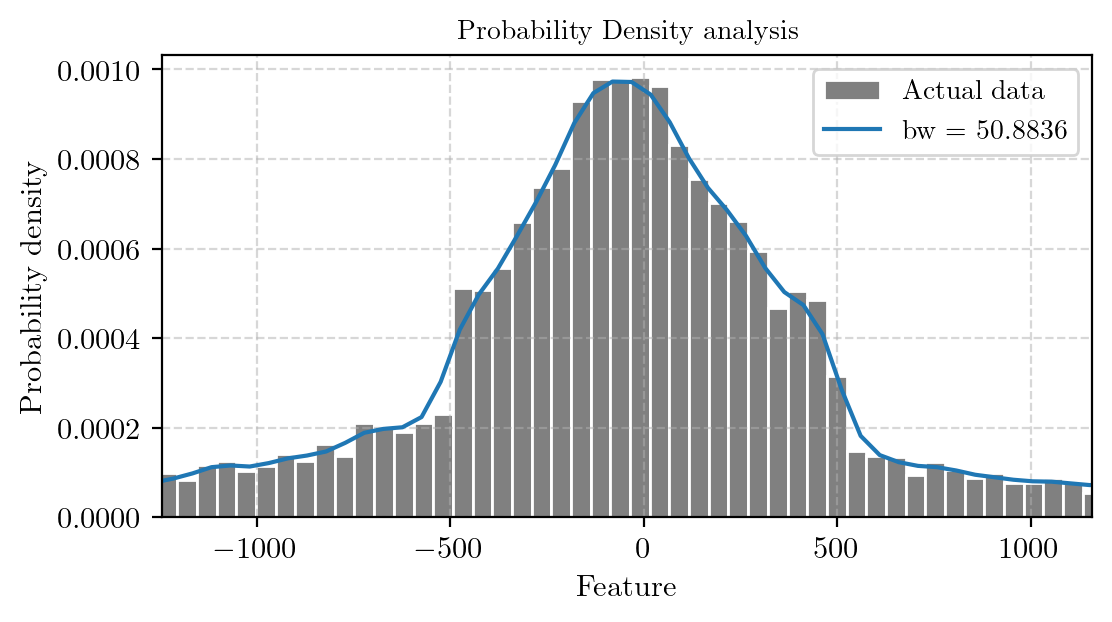

 - Bandwidth range = [0.5088, 50.8836]	Best bw = 50.88362  Conv. accuracy = 1.0000e+00


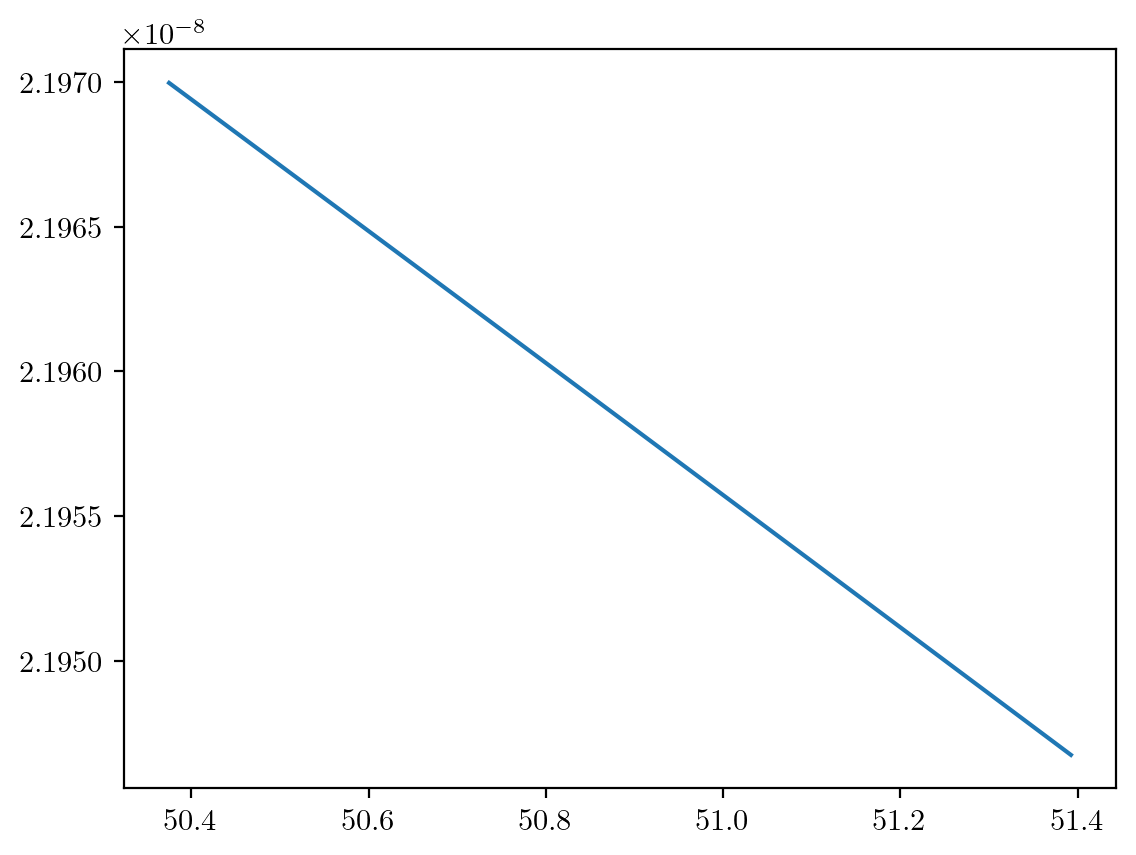

[ True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False]
99
[2.19699588e-08 2.19697255e-08 2.19694922e-08 2.19692589e-08
 2.19690256e-08 2.19687922e-08 2.19685589e-08 2.19683255e-08
 2.19680921e-08 2.19678586e-08 2.19676252e-08 2.19673917e-08
 2.19671582e-08 2.19669247e-08 2.19666912e-08 2.19664576e-08
 2.19662241e-08 2.19659905e-08 2.19657569e-08 2.19655233e-08
 2.19652896e-08 2.19650559e-08 2.19648222e-08 2.19645885e-08
 2.19643548e-08 2.196

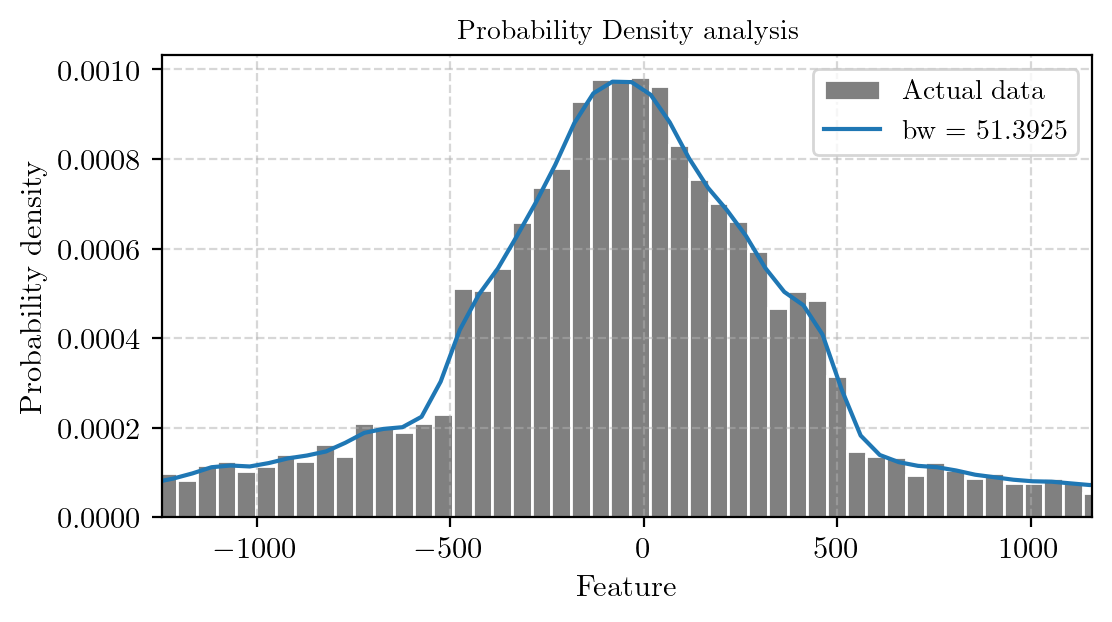

 - Bandwidth range = [50.3748, 51.3925]	Best bw = 51.39245  Conv. accuracy = 9.9010e-03


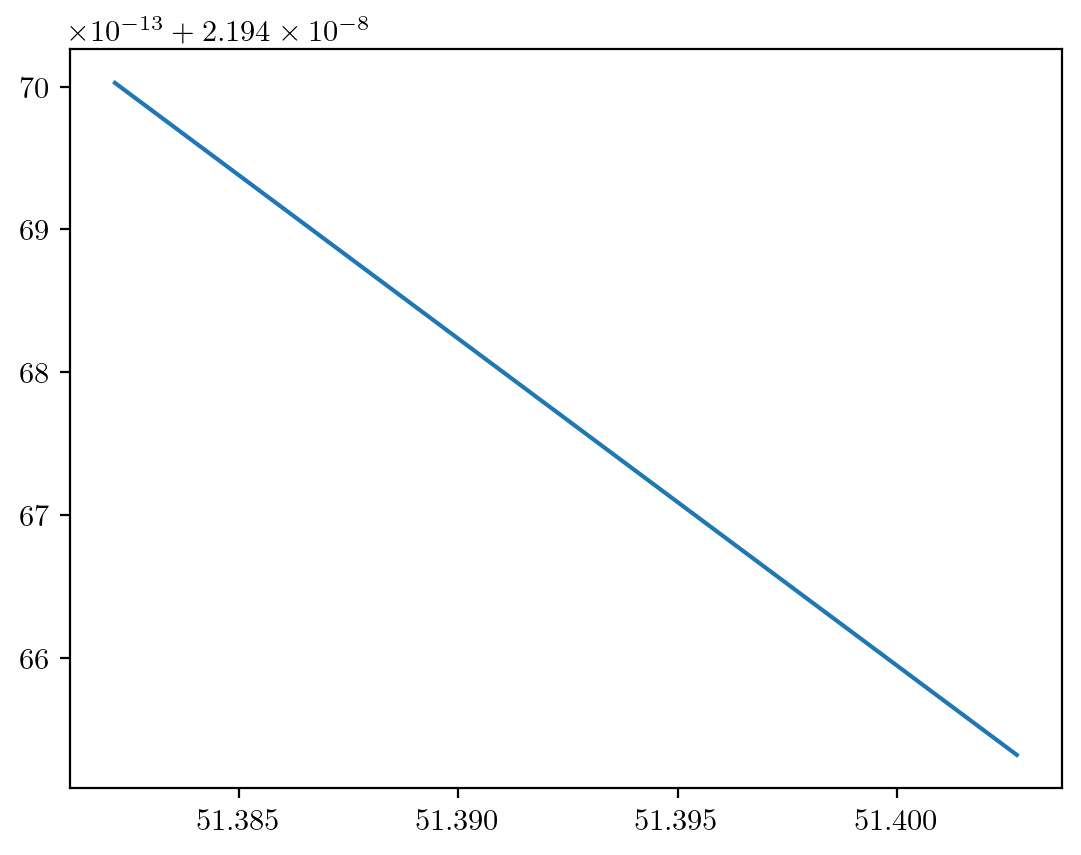

[ True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False]
99
[2.19470026e-08 2.19469979e-08 2.19469931e-08 2.19469884e-08
 2.19469836e-08 2.19469789e-08 2.19469741e-08 2.19469694e-08
 2.19469646e-08 2.19469598e-08 2.19469551e-08 2.19469503e-08
 2.19469456e-08 2.19469408e-08 2.19469361e-08 2.19469313e-08
 2.19469266e-08 2.19469218e-08 2.19469171e-08 2.19469123e-08
 2.19469076e-08 2.19469028e-08 2.19468981e-08 2.19468933e-08
 2.19468886e-08 2.194

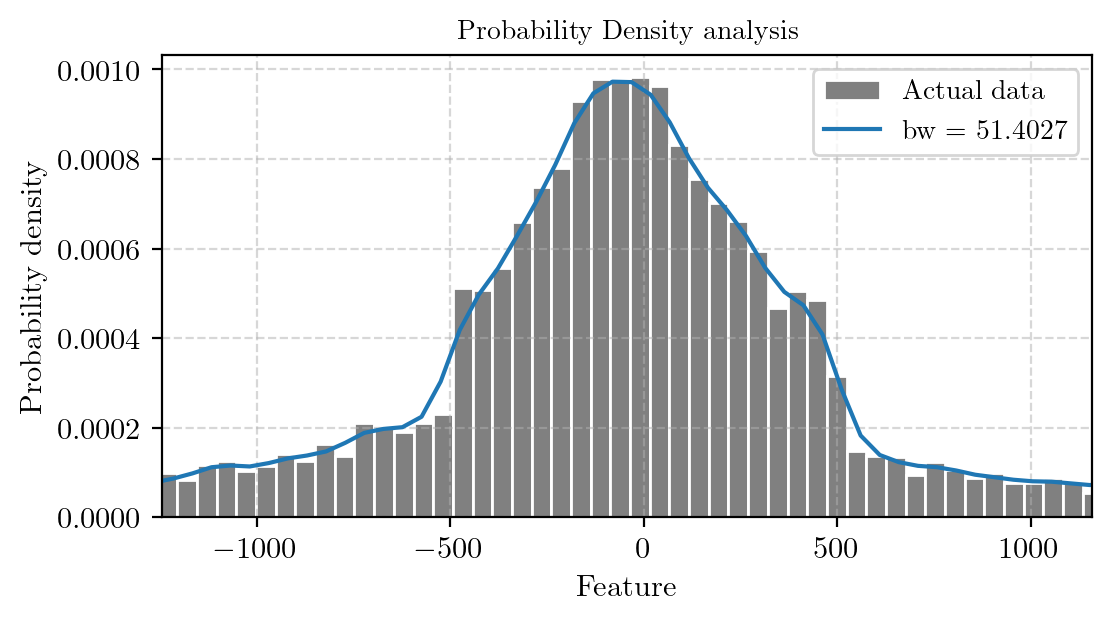

 - Bandwidth range = [51.3822, 51.4027]	Best bw = 51.40273  Conv. accuracy = 1.9998e-04


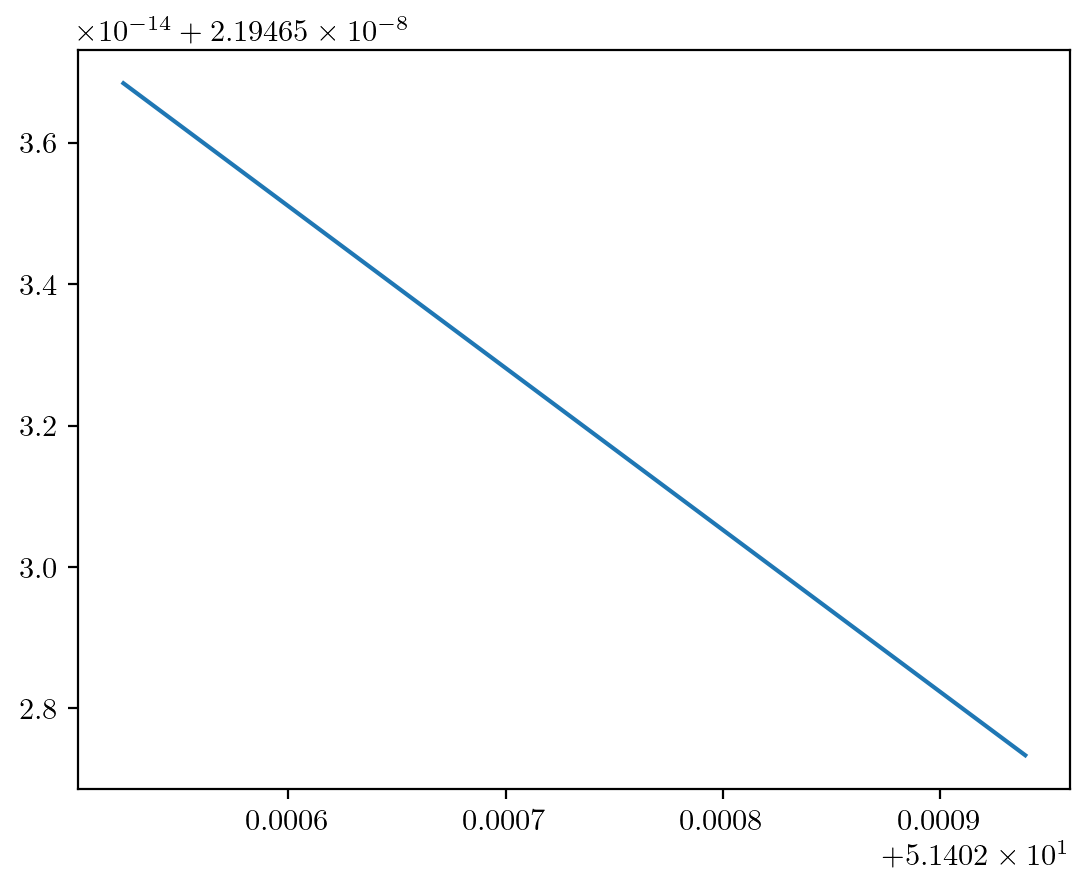

[ True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False]
99
[2.19465368e-08 2.19465367e-08 2.19465367e-08 2.19465366e-08
 2.19465365e-08 2.19465364e-08 2.19465363e-08 2.19465362e-08
 2.19465361e-08 2.19465360e-08 2.19465359e-08 2.19465358e-08
 2.19465357e-08 2.19465356e-08 2.19465355e-08 2.19465354e-08
 2.19465353e-08 2.19465352e-08 2.19465351e-08 2.19465350e-08
 2.19465349e-08 2.19465348e-08 2.19465347e-08 2.19465346e-08
 2.19465345e-08 2.194

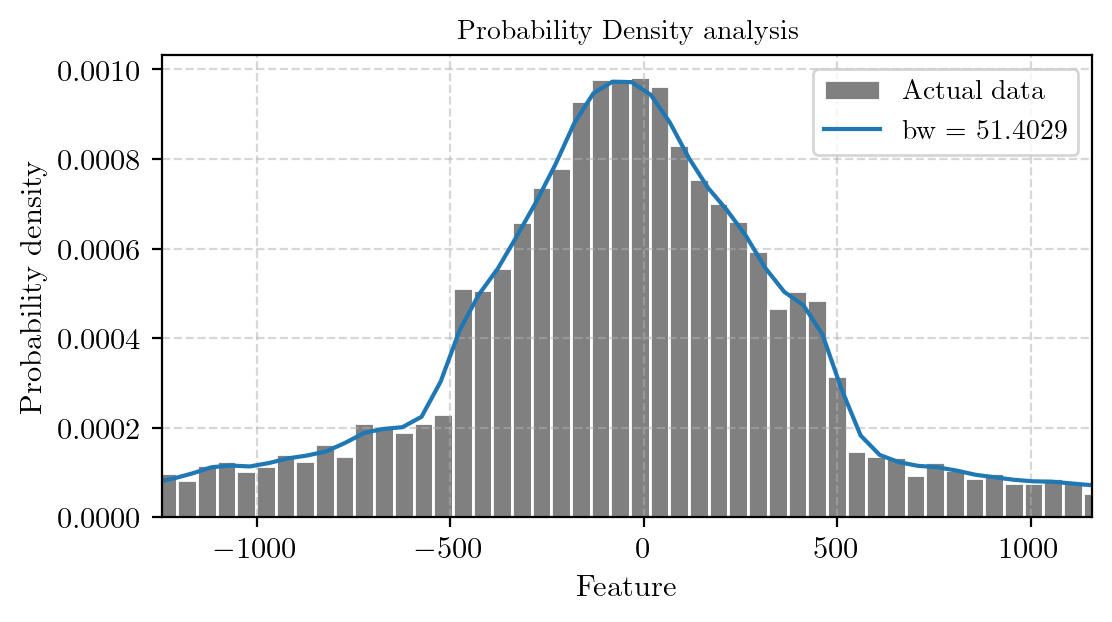

 - Bandwidth range = [51.4025, 51.4029]	Best bw = 51.40294  Conv. accuracy = 4.0400e-06

	 -> Batches =  5 ( 2630 d.p. per batch)  Best bw = 51.40273 Conv. accuracy = 4.0400e-06  MSE(apd, epd) = 2.1947e-08

[51.40273167  0.        ]


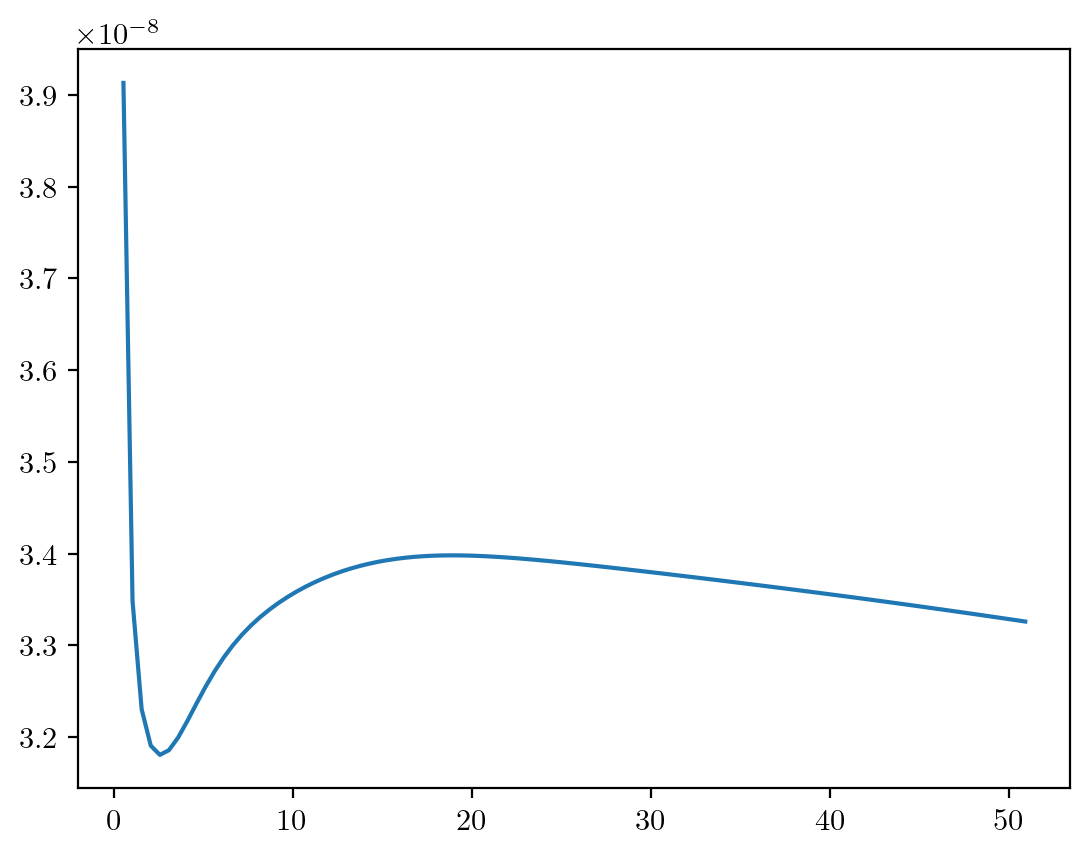

[ True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
  True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False]
4
[3.91313868e-08 3.34831225e-08 3.23029479e-08 3.19064716e-08
 3.18054198e-08 3.18574569e-08 3.19939186e-08 3.21717201e-08
 3.23618326e-08 3.25461788e-08 3.27153527e-08 3.28659918e-08
 3.29983168e-08 3.31142652e-08 3.32162976e-08 3.33067527e-08
 3.33875764e-08 3.34602714e-08 3.35259526e-08 3.35854381e-08
 3.36393357e-08 3.36881110e-08 3.37321343e-08 3.37717122e-08
 3.38071078e-08 3.3838

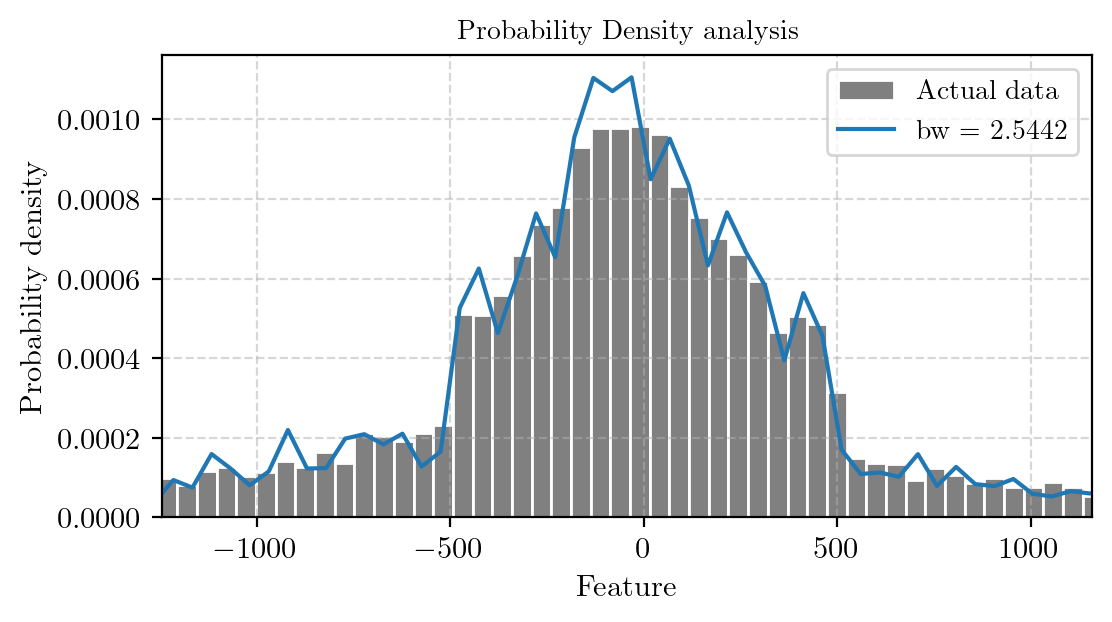

 - Bandwidth range = [0.5088, 50.8836]	Best bw = 2.54418  Conv. accuracy = 1.0000e+00


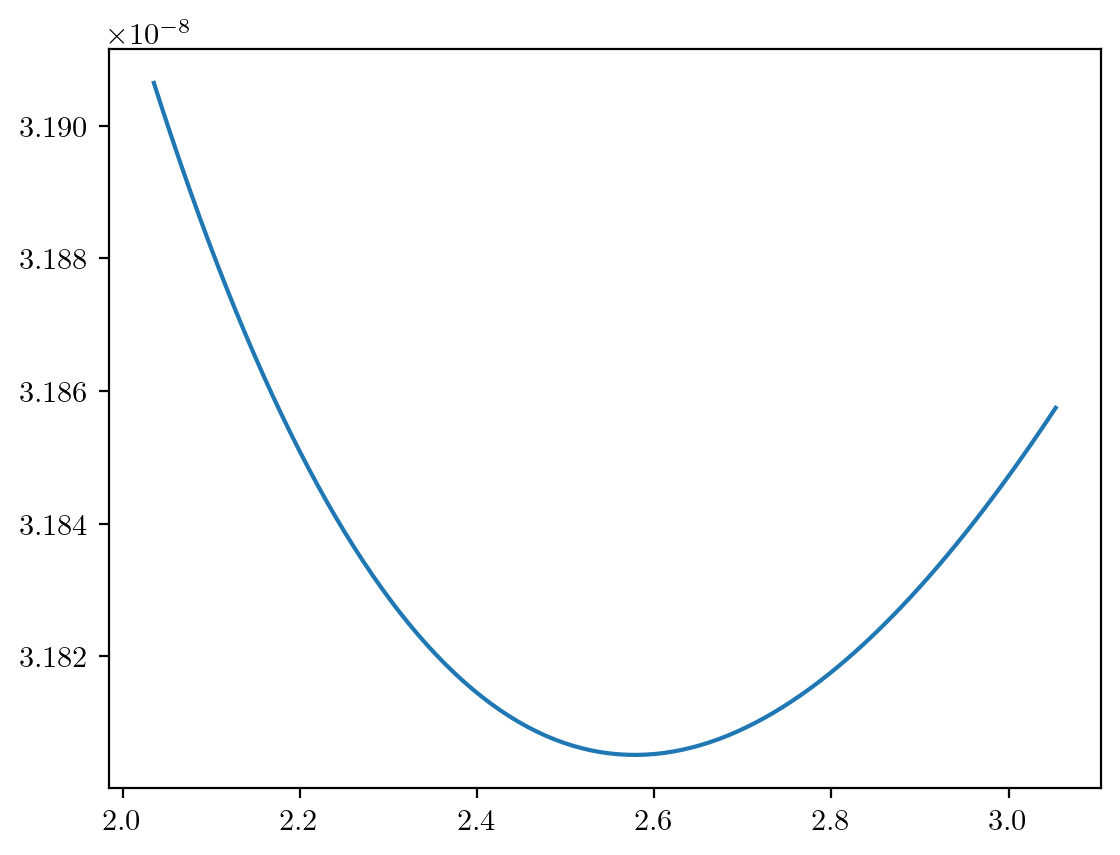

[ True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False  True]
53
[3.19064716e-08 3.19022157e-08 3.18980711e-08 3.18940363e-08
 3.18901099e-08 3.18862902e-08 3.18825758e-08 3.18789654e-08
 3.18754574e-08 3.18720506e-08 3.18687435e-08 3.18655348e-08
 3.18624233e-08 3.18594076e-08 3.18564866e-08 3.18536588e-08
 3.18509233e-08 3.18482787e-08 3.18457239e-08 3.18432578e-08
 3.18408793e-08 3.18385871e-08 3.18363804e-08 3.18342578e-08
 3.18322186e-08 3.183

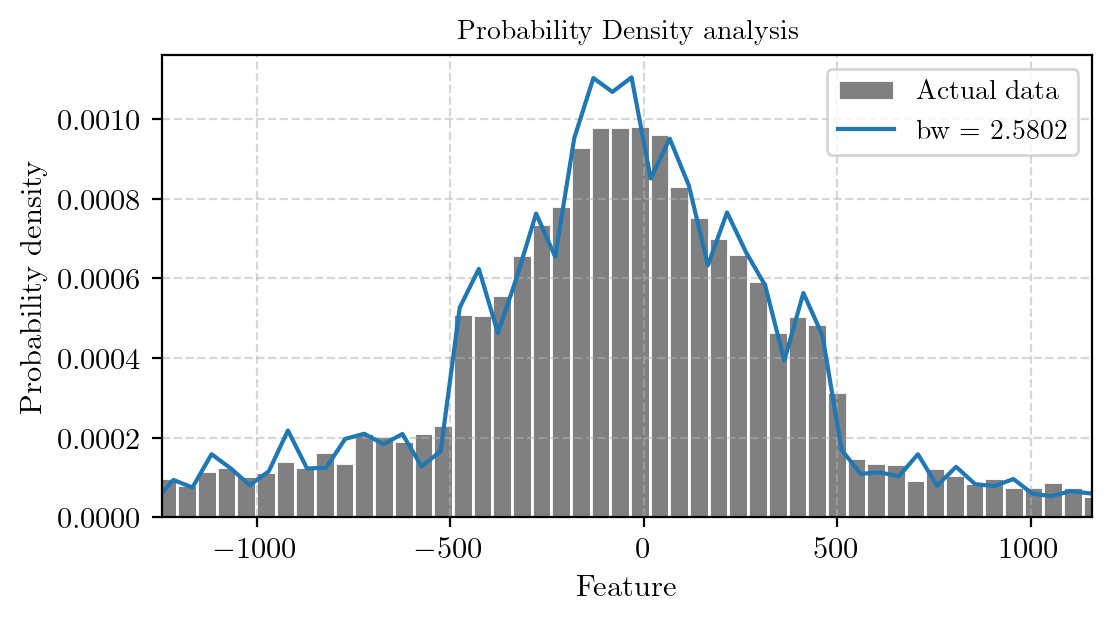

 - Bandwidth range = [2.0353, 3.0530]	Best bw = 2.58016  Conv. accuracy = 1.3944e-02


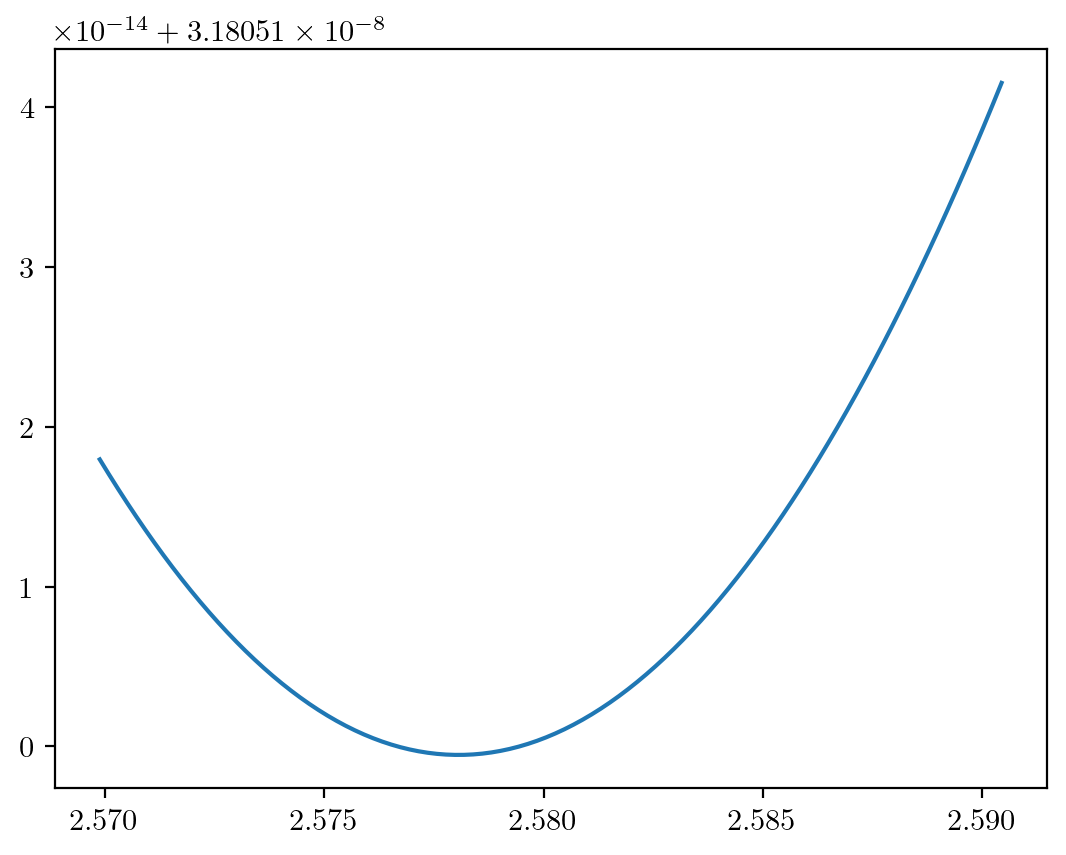

[ True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False  True]
39
[3.18051180e-08 3.18051170e-08 3.18051161e-08 3.18051152e-08
 3.18051144e-08 3.18051135e-08 3.18051127e-08 3.18051120e-08
 3.18051112e-08 3.18051105e-08 3.18051097e-08 3.18051091e-08
 3.18051084e-08 3.18051078e-08 3.18051071e-08 3.18051065e-08
 3.18051060e-08 3.18051054e-08 3.18051049e-08 3.18051044e-08
 3.18051039e-08 3.18051035e-08 3.18051031e-08 3.18051027e-08
 3.18051023e-08 3.180

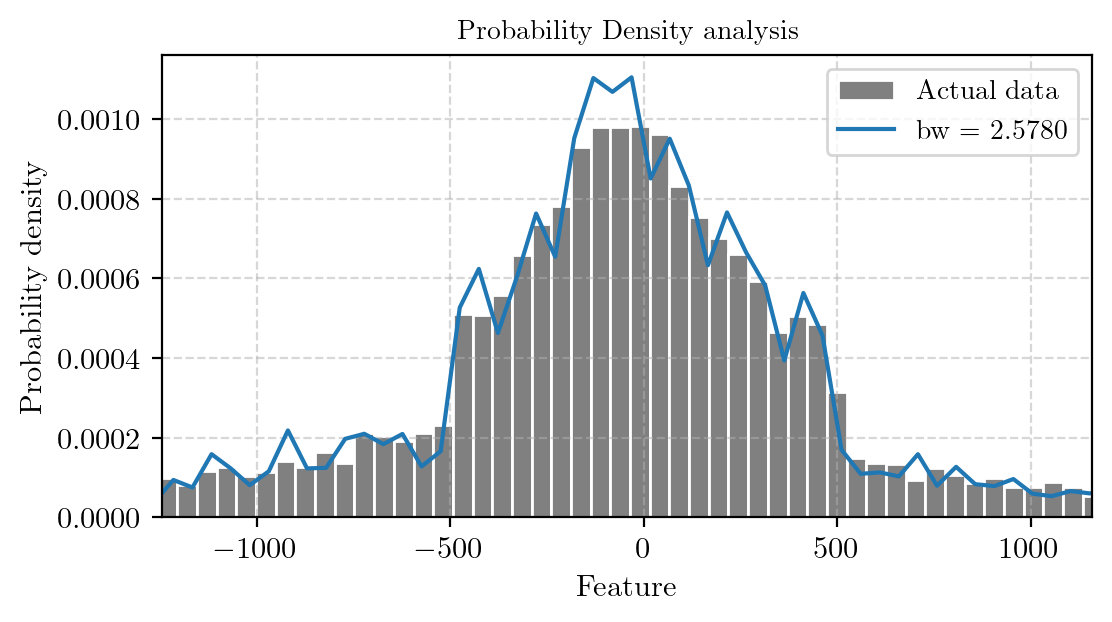

 - Bandwidth range = [2.5699, 2.5904]	Best bw = 2.57798  Conv. accuracy = 8.4582e-04


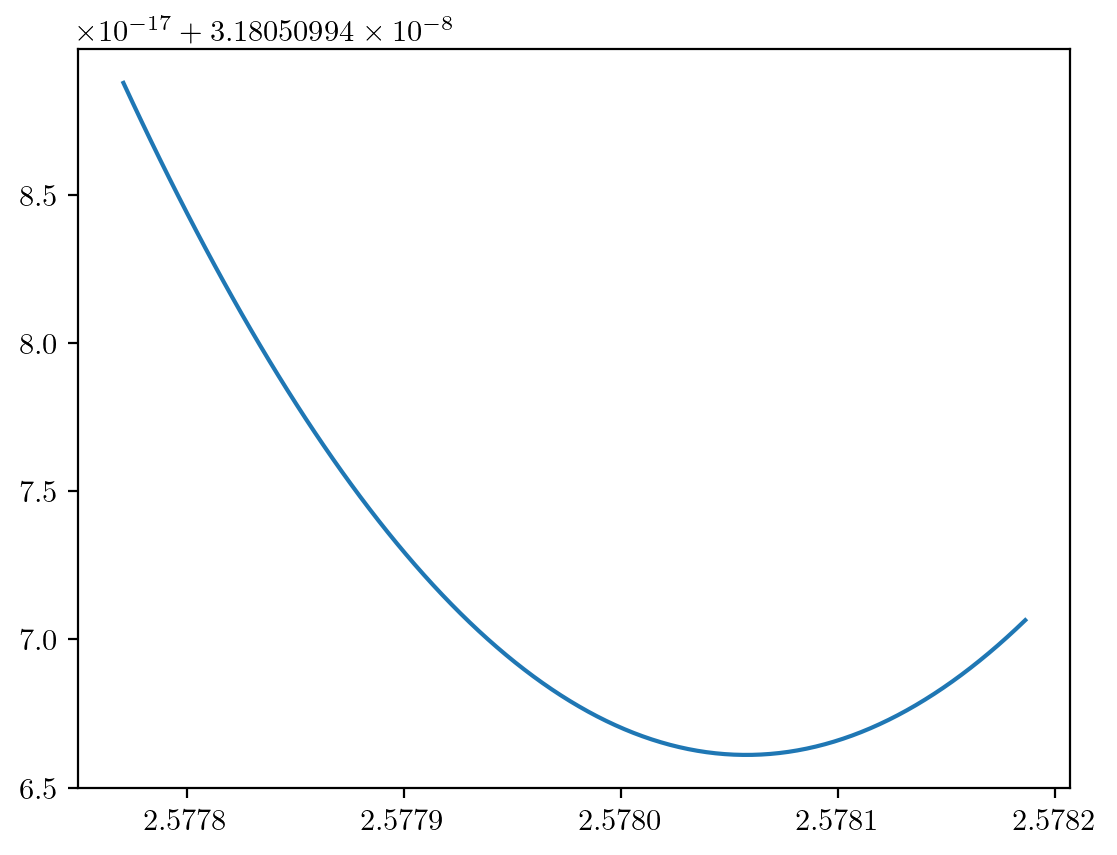

[ True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False  True]
68
[3.18050995e-08 3.18050995e-08 3.18050995e-08 3.18050995e-08
 3.18050995e-08 3.18050995e-08 3.18050995e-08 3.18050995e-08
 3.18050995e-08 3.18050995e-08 3.18050995e-08 3.18050995e-08
 3.18050995e-08 3.18050995e-08 3.18050995e-08 3.18050995e-08
 3.18050995e-08 3.18050995e-08 3.18050995e-08 3.18050995e-08
 3.18050995e-08 3.18050995e-08 3.18050995e-08 3.18050995e-08
 3.18050995e-08 3.180

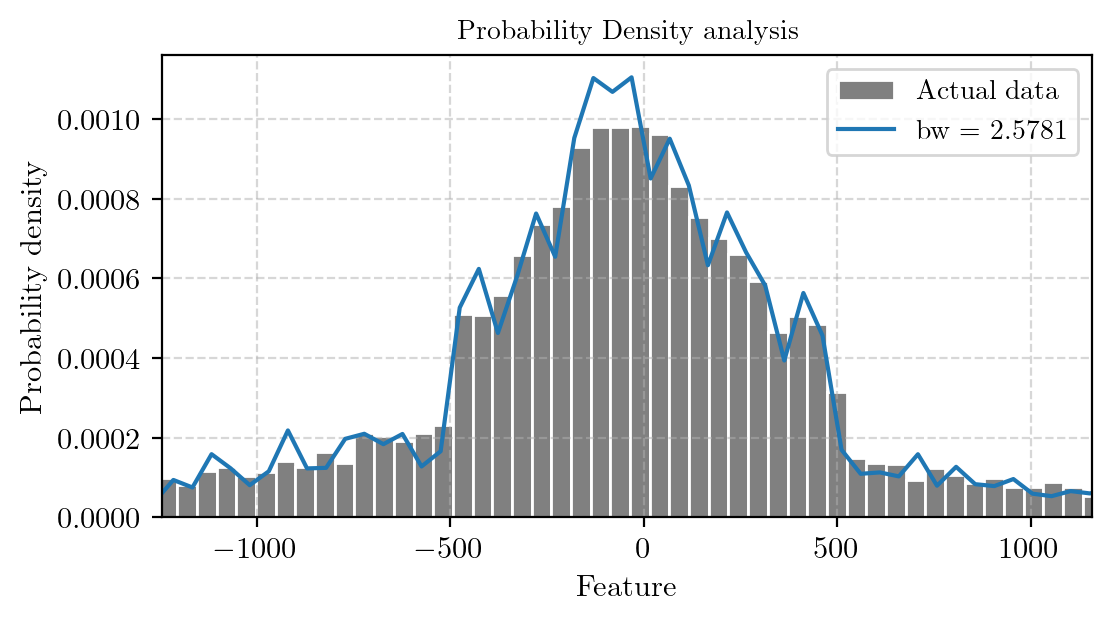

 - Bandwidth range = [2.5778, 2.5782]	Best bw = 2.57806  Conv. accuracy = 3.0105e-05


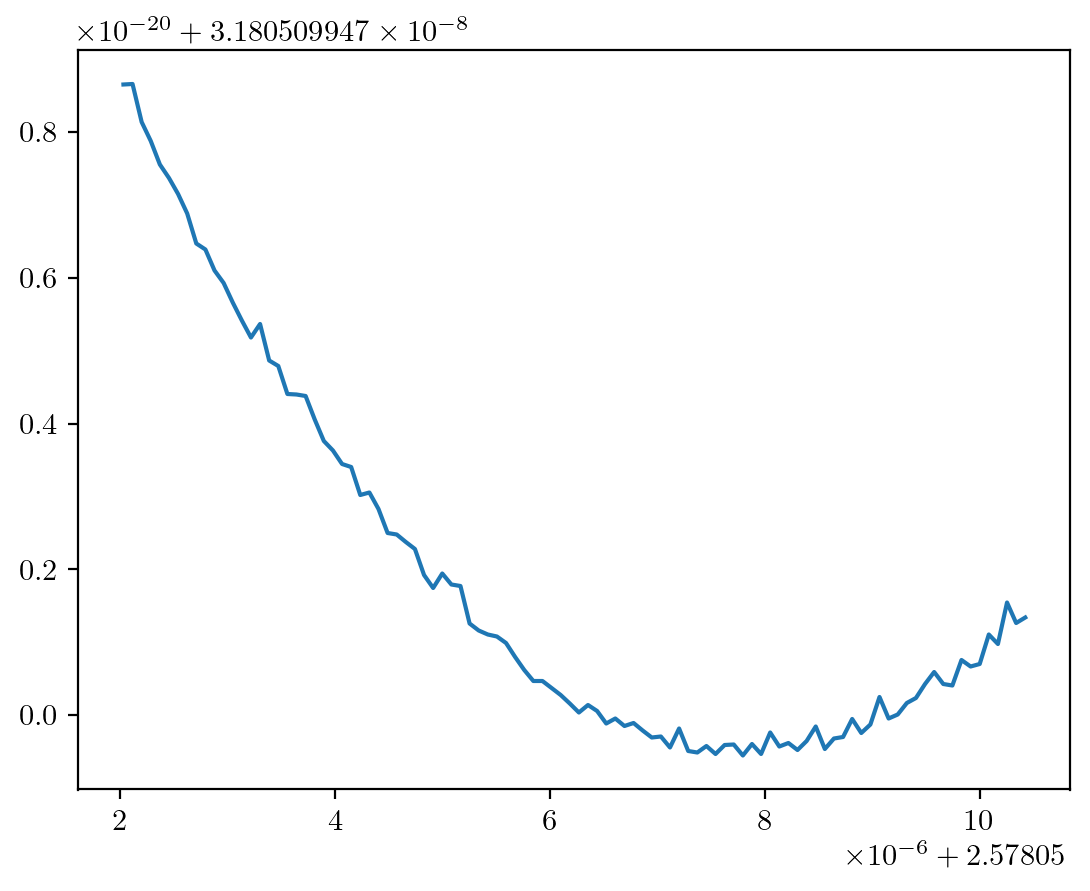

[False  True False False False False False False False False False False
 False False False  True False False False False False False False False
 False False False  True False False False False False False False  True
 False False False False False False False False False False False False
 False False False  True False False  True False  True False False  True
 False  True False False  True False False  True False  True False  True
 False  True False False  True False False False  True False False  True
 False False False False False  True False False  True False False  True
 False  True False  True]
68
[3.18050995e-08 3.18050995e-08 3.18050995e-08 3.18050995e-08
 3.18050995e-08 3.18050995e-08 3.18050995e-08 3.18050995e-08
 3.18050995e-08 3.18050995e-08 3.18050995e-08 3.18050995e-08
 3.18050995e-08 3.18050995e-08 3.18050995e-08 3.18050995e-08
 3.18050995e-08 3.18050995e-08 3.18050995e-08 3.18050995e-08
 3.18050995e-08 3.18050995e-08 3.18050995e-08 3.18050995e-08
 3.18050995e-08 3.180

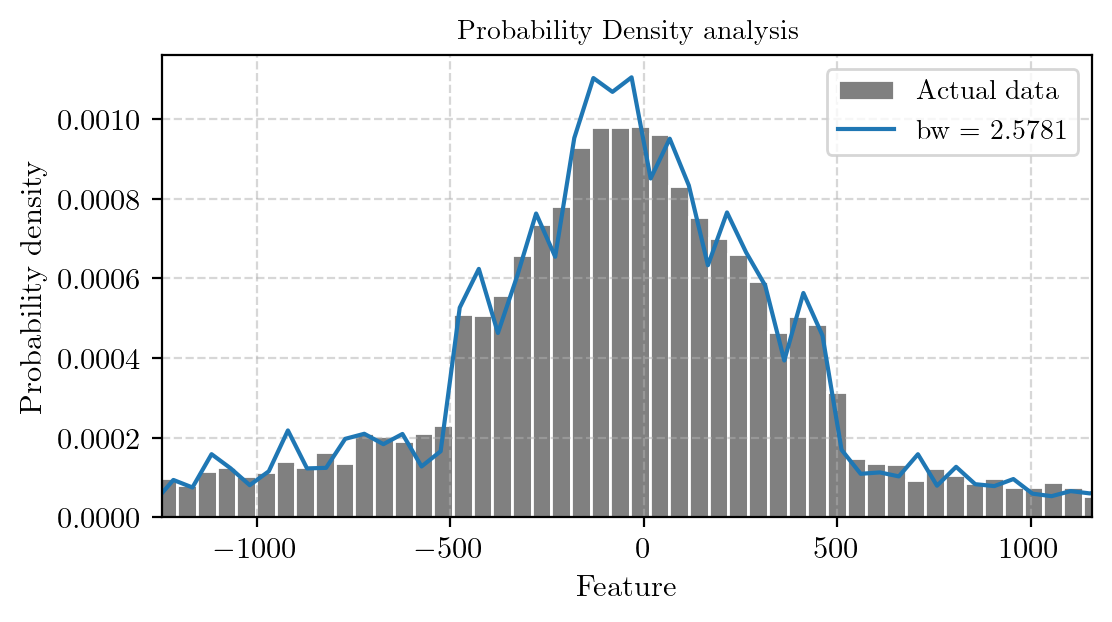

 - Bandwidth range = [2.5781, 2.5781]	Best bw = 2.57806  Conv. accuracy = 6.0819e-07

	 -> Batches =  6 ( 2192 d.p. per batch)  Best bw = 2.57806 Conv. accuracy = 6.0819e-07  MSE(apd, epd) = 3.1805e-08

[51.40273167  2.57805622]

Final Optimal bandwidth = 30	 MSE(apd, epd) = 4.380628500226783e-09


In [8]:
bw_msecv = sdg.bws_msecv(data, bins = utils.nbins(data, 'fd'), n_batches_min=5, n_batches_max=6, print_log = True)

[112.11998107 144.31539432]


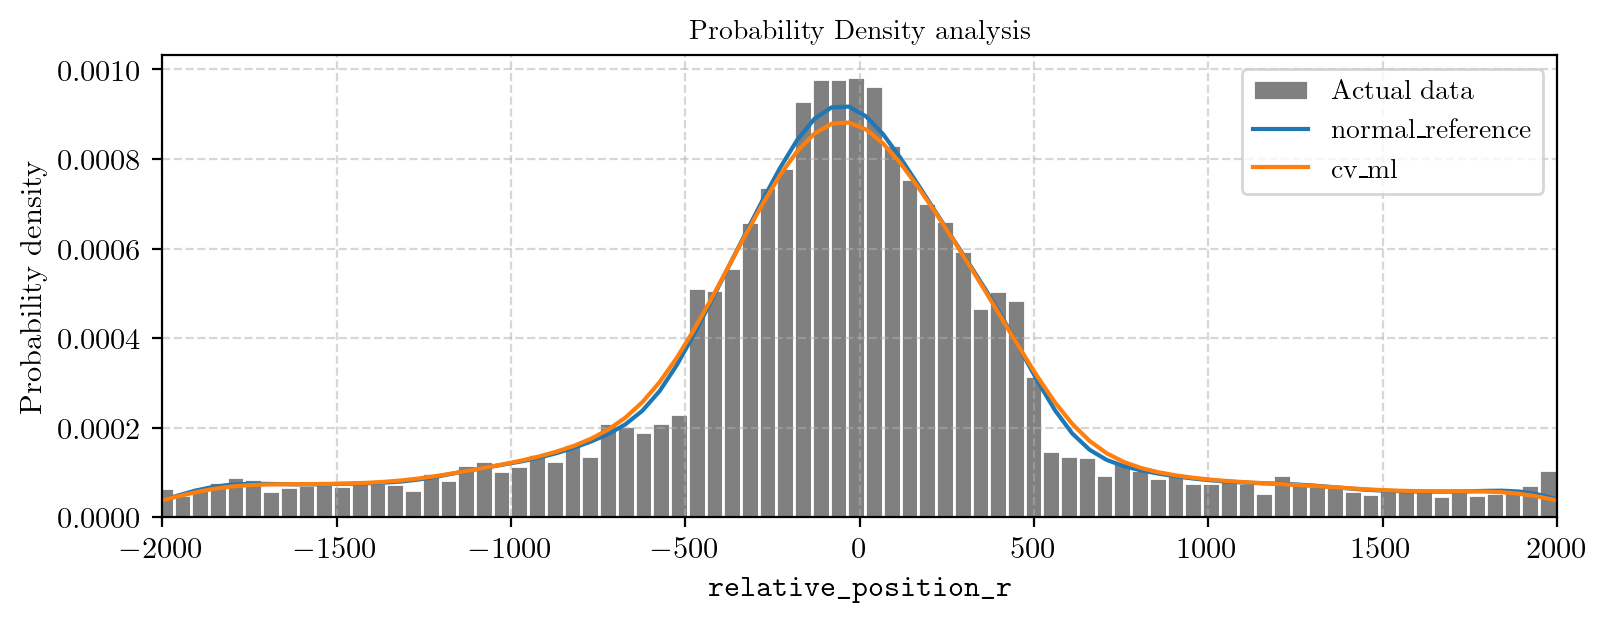

In [8]:
bw_statsmodels = sdg.bws_statsmodels(data)

bw_labels = list(bw_statsmodels.keys())
bandwidths = np.asarray(list(bw_statsmodels.values())).flatten()

print(np.asarray(list(bw_statsmodels.values())).flatten())

# Plot estimated probability density function vs actual density for visual comparison
kwargs = dict(figsize=(9,3), xlim=(-2000,2000),
             xlabel=r'\texttt{' + feature + '}',
             bw_labels = bw_labels)
sdg.plot_kde(data, bandwidths, **kwargs)

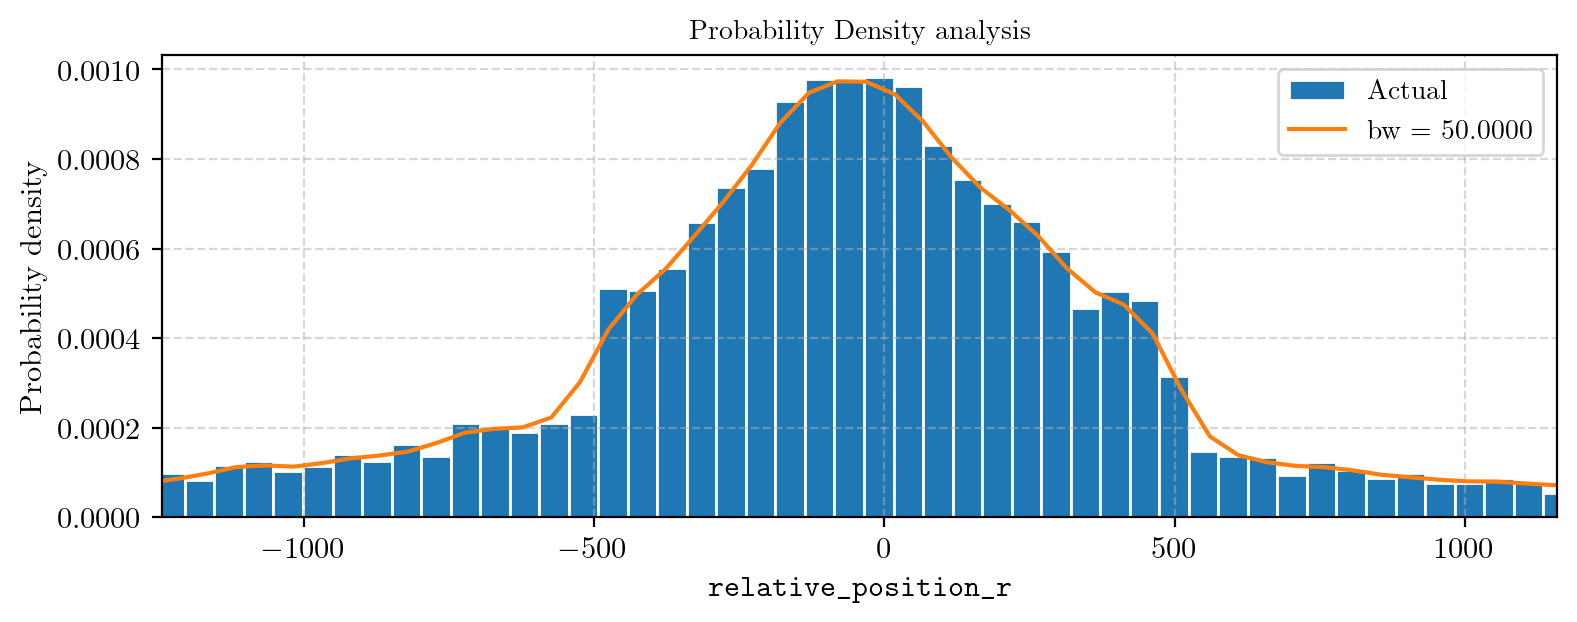

In [19]:
# Plot estimated probability density function vs actual density for visual comparison
sdg.plot_kde(data, [50], figsize=(9,3), xlabel=r'\texttt{' + feature + '}')

In [ ]:
def import_synthetic_data(filename):
    
    # Check if parametric_ranking dataset is available in the temporary folder
    filepath = os.path.join(cwd,'data','synthetic',filename)

    # Import ranking dataframe if already available
    if os.path.exists(filepath):
        df_synthetic = pd.read_csv(filepath_or_buffer=filepath, sep=',', header='infer', 
                              index_col=0, decimal='.', encoding='utf-8')
    else:
        # Check if temp folder already exists, create new one otherwise
        if not os.path.exists(os.path.join(cwd,'data','synthetic')): 
            os.mkdir(os.path.join(cwd,'data','synthetic'))

        # Initialize ranking dataframe to evaluate best distributions per column
        df_synthetic = pd.DataFrame(index = range(size))
        
    return df_synthetic, filepath

In [ ]:
# Import ranking if available
ranking, best_dists, filepath = import_stdists_ranking()

# Set the size of the synthetic dataset to create.
size=int(1e4)

df_synthetic, filepath = import_synthetic_data('synthetic_data_' + str(int(size/1000)) + 'k.csv')
df_synthetic.head(10)

for feature in methods['parametric']:
    
    # Set column name to study and remove outliers. 
    data = df_lastCDM[feature]
    
    # Check if variable has already been processed
    stdist = eda.FitScipyDistribution(data, eval('st.' + best_dists[feature]['dist']))
    
    if feature in df_synthetic.columns:
        synthetic_data = df_synthetic[feature]
    else:

        # Set the Random variates keyword arguments for the synthetic data generation
        rvs_kwargs = {'size': size}

        if feature == 'elevation':
            rvs_kwargs.update({'limits':(-70, 70)})
        elif ((feature[0] in ['t', 'c']) and (feature[2:3]=='c')):
            rvs_kwargs.update({'limits':(-1, 1)}) 

        # Randomly create new synthetic data
        synthetic_data = stdist.rvs(**rvs_kwargs)
    
        df_synthetic = df_synthetic.join(pd.DataFrame(data=synthetic_data, columns=[feature]))
        
        # Export results to a CSV file
        df_synthetic.to_csv(path_or_buf=filepath, sep=',', header=True, index=True, decimal='.')
    
    
    # Compute bins and standard data limits for a better representation of the histograms
    bins = utils.nbins(data, 'fd')
    std_lims = utils.outliers_boundaries(data, threshold = 1.5, positive_only=(np.sum(data<0)==0))

    # Plot actual vs synthetic data vs PDF for comparison
    plt.figure(figsize=(7, 3))
    
    axes = plt.gca()
     
    om = '{:.2e}' if  max(utils.order_of_magnitude(data.min()), utils.order_of_magnitude(data.max()))>=5 else '{:.2f}'
    
    description = pd.DataFrame({'Actual': data}).describe()\
                  .join(pd.DataFrame({'Synthetic': synthetic_data}).describe())

    text = df_to_latex(description.applymap(om.format))

    t = axes.text(1.04, 0.5, text, size=10, ha='left', va='center', c='black', transform=axes.transAxes, 
              bbox=dict(facecolor='white', edgecolor='black', alpha=0.75, pad=5))
    
    n, bin_edges, patches = plt.hist([data, synthetic_data], bins=bins['n'], density=True, histtype='bar', 
                                     label=['Actual', 'Synthetic'], color=['dimgrey','lightskyblue'])

    pdf = stdist.pdf()
    plt.plot(pdf.index.to_numpy(), pdf.values, lw=1.5, 
             color = "orange", label=r"PDF (\texttt{" + stdist.name + "})")
    
    plt.ylabel(r'Probability density of ocurrence', fontsize=10)
    plt.xlabel(r'\texttt{' + feature + '}', fontsize=10)
    plt.xlim(max(bin_edges[0]  - bins['width'],std_lims[0]) , 
             min(bin_edges[-1] + bins['width'],std_lims[1]))

    plt.title(r'Actual vs synthetic data probability density', fontsize=10)
    plt.grid(True, linestyle='dashed', alpha=0.5)
    plt.legend(loc='best', fontsize=10)

    plt.show()



In [ ]:
# Import ranking if available
ranking, best_dists, filepath = import_stdists_ranking()

# Initialize parametric features
parametric_features = methods['parametric']

for cluster, subclusters in parametric_features.items():

    if not isinstance(subclusters, dict): subclusters = {cluster:subclusters}
    
    for subcluster, features in subclusters.items():
            
        for feature in features:
            print(feature)
            # Set column name to study and remove outliers. 
            data = df_lastCDM[feature].dropna()

            # Check if variable has already been processed
            if not feature in ranking.columns:
                print(f'Feature: {feature} is has not been fitted yet to any SciPy distribution.')
                continue
            
            # stdist = eda.FitScipyDistribution(data, eval('st.' + best_dists[feature]['dist']))
            stdist = best_dists[feature]

            print(f'Cluster: {subcluster}\nFeature: {feature}' 
                  f'\nDistribution: {stdist["dist"].name}\nR2 score: {stdist["r2_score"]:.4f}\n')
                
            # Print plot including histogram and distribution fitted
            plt_kwargs={'xlabel': r'\texttt{' + feature + '}', 'describe':True}
            sdg.plot_scipy_pdf(data, stdist, **plt_kwargs)